In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

d = pd.read_csv("combined_data.csv")

In [4]:
d.head()

,phraseid,l1,l2,q1,q2,participant
0,1,son,son,5,5,npirprirhe
1,2,dotter,dotter,5,5,npirprirhe
2,3,mother,mor,5,5,npirprirhe
3,4,father,far,5,5,npirprirhe
4,5,"Hi, a black coffee please, a small one.","Hej, ett svart kaffe, tack. Ett litet.",2,2,npirprirhe


In [13]:
averages = d.groupby("phraseid", as_index=False)[["q1", "q2"]].mean()

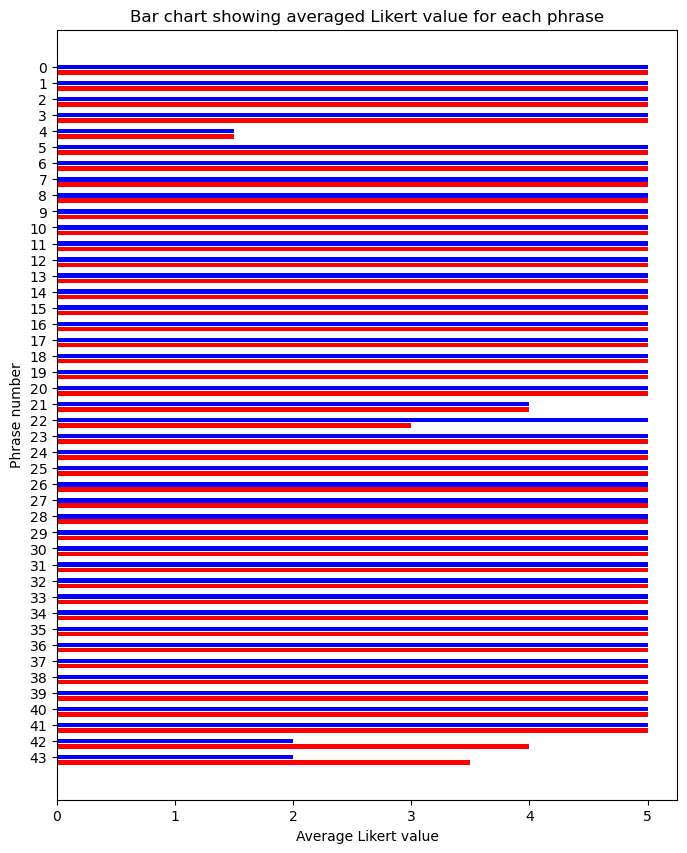

In [103]:

fig, ax = plt.subplots( figsize=(8, 10))

people = [str(c) for c in range(44)]
y_tick_modifer=1.8
y_ticks = [y_tick_modifer*c for c in np.arange(len(people))]
bar_offset=0.3
y_pos_1 = [c-bar_offset for c in y_ticks]
y_pos_2 = [c+bar_offset for c in y_ticks]

ax.barh(y_pos_1, averages["q1"], height=0.5, align="center", color="blue")
ax.barh(y_pos_2, averages["q2"], height=0.5, align="center", color="red")
plt.yticks(y_ticks)  # ticks at -1, -0.5, 0, 0.5, 1

ax.set_yticks(y_pos_1, labels=people)

ax.invert_yaxis() 
ax.set_xlabel('Average Likert value')
ax.set_ylabel("Phrase number")
ax.set_title('Bar chart showing averaged Likert value for each phrase')

plt.show()
fig.savefig("phrasereviewplot.png")